In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

This tutorial contains the basics of plotting in Python / Jupyter.
We will mostly relying on Matplotlib and Seaborn, make sure to have those installed !

# Hello world

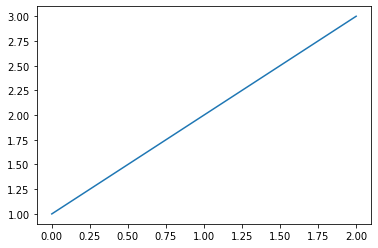

In [2]:
x = [1,2,3]
plt.plot(x)

#### What is the problem ?

Plot does not start at origin, no labels on axes, x axis scale doesn't make any sense since we only have 3 points, also no sense in making a line for only 3 points

# Line plot

<function matplotlib.pyplot.show(*args, **kw)>

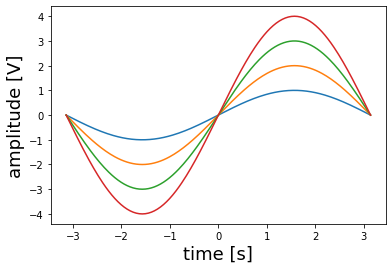

In [4]:
for i in range(1,5):
    x = np.linspace(-np.pi, np.pi, 201)
    plt.plot(x, np.sin(x)*i)
    
plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.show

#### What is the problem ?

No title, negative time? -> has to be defined if it is before a certain event, no labels for the different curves -> what do the colors correspond to?

# Error bars

In [5]:
# Data
var1 = np.random.normal(10,1,10000)
var2 = np.random.normal(10,10,10000)
var3 = np.random.normal(10,100,10000)

# Calculate the average
var1_mean = np.mean(var1)
var2_mean = np.mean(var2)
var3_mean = np.mean(var3)

# Calculate the standard deviation
var1_std = np.std(var1)
var2_std = np.std(var2)
var3_std = np.std(var3)

# Define labels, positions, bar heights and error bar heights
labels = ['var1', 'var2', 'var3']
x_pos  = np.arange(len(labels))
CTEs   = [var1_mean, var2_mean, var3_mean]
error  = [var1_std*2, var2_std*2, var3_std*2]

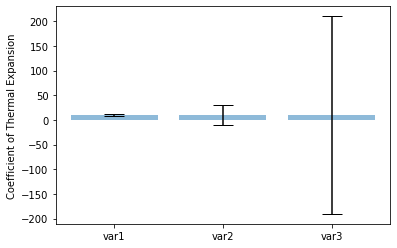

In [8]:
plt.bar(x_pos, CTEs,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10, 
       tick_label=labels,
       yerr = error)

plt.ylabel('Coefficient of Thermal Expansion')
_ = plt.xticks(x_pos)

#### What is the problem ?

Error bars were not plotted -> made it seem like the 3 data points were almost at the same value w/o any other difference, whereas in reality the variation of the 3rd is huge, doesn't make sense to plot the mean w/o the variance

# Markers / legend

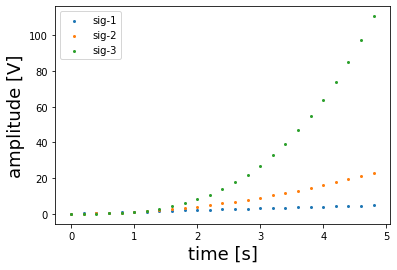

In [12]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.scatter(t, t, label="sig-1", s=4)
plt.scatter(t, t**2, label="sig-2", s=4)
plt.scatter(t, t**3, label="sig-3", s=4)

plt.xlabel("time [s]", fontsize=18)
plt.ylabel("amplitude [V]", fontsize=18)
plt.legend()

#### What is the problem ?

plotted as continuous even it is actually a discrete sampled signal, also labels are unclear?

# Non-linear scale

In [26]:
mu, sigma = 3., 1 # mean and standard deviation
s = np.random.lognormal(mu, sigma, 100000)

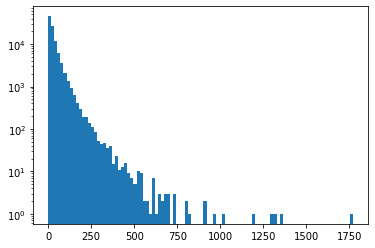

In [27]:
_ = plt.hist(s, log=True, bins =100)

#### What is the problem?

Normal scale is used instead of log scale. Makes it seem as if all the points are concentrated in one location and the others are hard to see. Also not enough bins -> all the points all too clustered. y axis = nb points at this value, x = value of the points -> we have a few outliers around 600

# Seaborn !

2924 2924


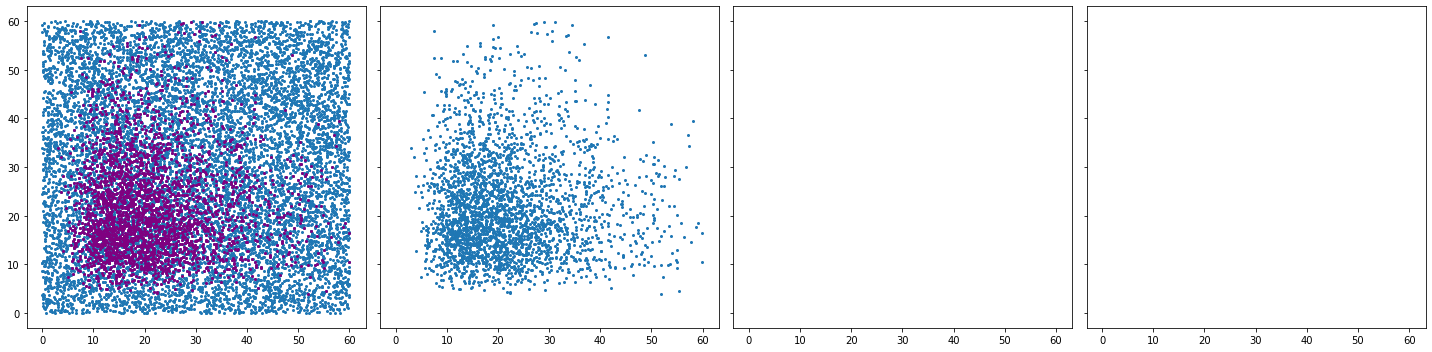

In [103]:
mu, sigma = 3., 0.5 # mean and standard deviation
x = np.random.lognormal(mu, sigma, 3000)
y = np.random.lognormal(mu, sigma, 3000)
#x[x>60] = np.mean(x)      #done to remove outliers?? --> bad idea bc creates clusters in middle
#y[y>60] = np.mean(y)
#better -> remove all outliers in both x and y
not_outlier_indices = [(ai<60 and bi<60) for ai,bi in zip(x,y)]
#print(outlier_indices)
x = x[not_outlier_indices]
y = y[not_outlier_indices]

x_new = np.append(x,np.random.uniform(0,60,10000))
y_new = np.append(y,np.random.uniform(0,60,10000))
print(len(x), len(y))

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)
axes[0].scatter(x_new, y_new, s=4)
axes[0].scatter(x, y, s=4, color = "purple")
axes[1].scatter(x, y, s=4)


f.tight_layout()

#### What is the problem ?

Too clustered --> cannot see the pattern well --> do not set the outliers to the mean value, better to delete them

# Resources

* [Matplotlib gallery](https://matplotlib.org/gallery.html)
* [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)
* [D3 gallery](https://github.com/d3/d3/wiki/Gallery)